Notebook used to create the summarizing visualizations for the static runs of the tumor model Figure 23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyabc

import os
import seaborn as sns


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
from matplotlib import rc
rc('font', **font)

In [2]:
#global variables
psize=500
wsize=1536
path="/home/felipe/testresults/Tumor/StatRepetitions"

iters_LA = range(8)
iters_DYN = range(8)
histories_LA = []
histories_DYN = []

#Read in the databases as pyabc.history objects
for i in iters_LA:
    histories_LA.append(pyabc.History("sqlite:///" +
                                      os.path.join(path,
                                                   "TumorResIter"+str(i)+".db")))
for i in iters_DYN:
    histories_DYN.append(pyabc.History("sqlite:///" +
                                      os.path.join(path,
                                                   "TumorRes_oriIter"+str(i)+".db")))

In [3]:
#extract data into dataframes
LAdataframes = []

for j in range(len(histories_LA)):
    LADF=histories_LA[j].get_all_populations()
    starttime = LADF["population_end_time"][0]
    
    new_col=[]
    for i in range(0,len(LADF)):
        new_col.append((LADF["population_end_time"][i] - 
                        LADF["population_end_time"][0]).total_seconds())
    
    LADF.insert(2, "time_passed_s", new_col, True)
    LAdataframes.append(LADF)
    
    
DYNdataframes = []

for j in range(len(histories_DYN)):
    DYNDF=histories_DYN[j].get_all_populations()
    starttime = DYNDF["population_end_time"][0]

    new_col=[]
    for i in range(0,len(DYNDF)):
        new_col.append((DYNDF["population_end_time"][i] -
                        DYNDF["population_end_time"][0]).total_seconds())
        
    DYNDF.insert(2, "time_passed_s", new_col, True)
    DYNdataframes.append(DYNDF)


In [4]:
#extract mean, max and min values

n_gens = min(len(LAdataframes[j]) for j in range(len(LAdataframes)))
LAMaxTimes = np.zeros(n_gens)
LAMinTimes = np.zeros(n_gens)
LAMeanTimes = np.zeros(n_gens)

for i in range(n_gens):
    times = [LAdataframes[j].loc[i,"time_passed_s"] for j in range(len(LAdataframes))]
    LAMaxTimes[i] = max(times)
    LAMinTimes[i] = min(times)
    LAMeanTimes[i] = np.array(times).mean()

    
n_gens = min(len(DYNdataframes[j]) for j in range(len(DYNdataframes)))
DYNMaxTimes = np.zeros(n_gens)
DYNMinTimes = np.zeros(n_gens)
DYNMeanTimes = np.zeros(n_gens)

for i in range(n_gens):
    times = [DYNdataframes[j].loc[i,"time_passed_s"] for j in range(len(DYNdataframes))]
    DYNMaxTimes[i] = max(times)
    DYNMinTimes[i] = min(times)
    DYNMeanTimes[i] = np.array(times).mean()

print(LAMaxTimes[-1]/DYNMinTimes[-1], LAMinTimes[-1]/DYNMaxTimes[-1])

1.2241856025530895 0.64486436154664


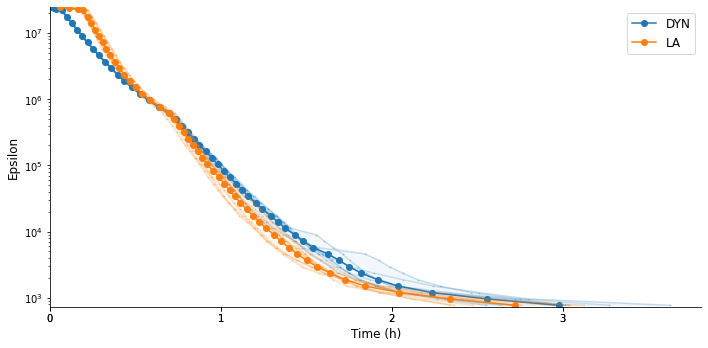

In [5]:
fig, axes = plt.subplots(1,1, figsize=(10,5))

markersize = 1
alpha = 0.2

min_eps = DYNdataframes[j].loc[n_gens-1,"epsilon"]
max_eps = DYNdataframes[j].loc[1,"epsilon"]

ax = axes
ax.plot(DYNMeanTimes, DYNdataframes[0]["epsilon"], label = "DYN",
        color="tab:blue", marker="o", alpha=1)
for j in range(len(histories_DYN)):
    ax.plot(DYNdataframes[j]["time_passed_s"], DYNdataframes[j]["epsilon"],
            color="tab:blue", marker="o", markersize=markersize, alpha=alpha)


ax.plot(LAMeanTimes, LAdataframes[j]["epsilon"], label = "LA",
        color="tab:orange", marker="o", alpha=1)
for j in range(len(histories_LA)):
    ax.plot(LAdataframes[j]["time_passed_s"], LAdataframes[j]["epsilon"],
            color="tab:orange", marker="o", markersize=markersize, alpha=alpha)

    
ax.fill(np.append(LAMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(LAdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "tab:orange", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(DYNMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(DYNdataframes[0]["epsilon"])[1:])),
        color = "tab:blue", alpha=0.3*alpha)

ax.set_yscale("log")
ax.set_ylabel("Epsilon")
ax.set_xlabel("Time (h)")

ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0.95*min_eps, ymax=max_eps)
xticklabels=[int(a/3600) for a in (ax.get_xticks())]
ax.set_xticks([a*3600 for a in xticklabels])
ax.set_xticklabels(xticklabels)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

fig.tight_layout()
fig.savefig("/home/felipe/MTGraphics/Tumor/TumorStatMean.pdf")

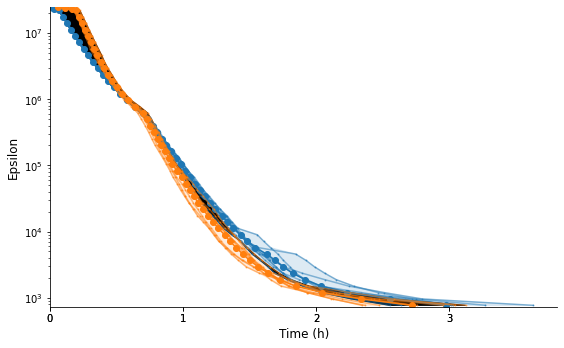

In [6]:
fig, axes = plt.subplots(1,1, figsize=(8,5))
ax = axes
markersize = 1
alpha = 0.5

min_eps = DYNdataframes[j].loc[n_gens-1,"epsilon"]
max_eps = DYNdataframes[j].loc[1,"epsilon"]

ax.plot(DYNMeanTimes, DYNdataframes[0]["epsilon"],
        color="tab:blue", marker="o", alpha=1)

for j in range(len(histories_DYN)):
    ax.plot(DYNdataframes[j]["time_passed_s"], DYNdataframes[j]["epsilon"],
            color="tab:blue", marker="o", markersize=markersize, alpha=alpha)
ax.plot(0,0, label="DYN",
        color="tab:blue", marker="o", markersize=markersize, alpha=alpha)


ax.plot(LAMeanTimes, LAdataframes[j]["epsilon"],
        color="tab:orange", marker="o", alpha=1)
for j in range(len(histories_LA)):
    ax.plot(LAdataframes[j]["time_passed_s"], LAdataframes[j]["epsilon"],
            color="tab:orange", marker="o", markersize=markersize, alpha=alpha)
ax.plot(0,0, label="LA",
        color="tab:orange", marker="o", markersize=markersize, alpha=alpha)

ax.plot(0,0,label="Means",
        color="black", marker="o", alpha=1)


ax.fill(np.append(LAMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(LAdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "tab:orange", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(DYNMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(DYNdataframes[0]["epsilon"])[1:])),
        color = "tab:blue", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "black", alpha=1, label="Overlap")

ax.set_yscale("log")
ax.set_ylabel("Epsilon")
ax.set_xlabel("Time (h)")

DYNMinEndtime=min(DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes)))
DYNMaxEndtime=max(DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes)))
LAMinEndtime=min(LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes)))
LAMaxEndtime=max(LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes)))

ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0.95*min_eps, ymax=max_eps)
xticklabels=[int(a/3600) for a in (ax.get_xticks())]
ax.set_xticks([a*3600 for a in xticklabels])
ax.set_xticklabels(xticklabels)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.legend()

fig.tight_layout()
fig.savefig("/home/felipe/MTGraphics/Tumor/TumorStatEpsMeansOverlap.jpg")

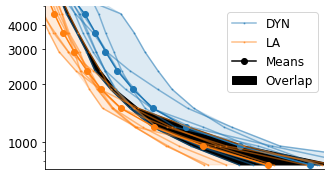

In [7]:
fig, axes = plt.subplots(1,1, figsize=(5,3))
ax = axes
markersize = 1
alpha = 0.5

ax.plot(DYNMeanTimes, DYNdataframes[0]["epsilon"],
        color="tab:blue", marker="o", alpha=1)

for j in range(len(histories_DYN)):
    ax.plot(DYNdataframes[j]["time_passed_s"], DYNdataframes[j]["epsilon"],
            color="tab:blue", marker="o", markersize=markersize, alpha=alpha)
ax.plot(0,0, label="DYN",
        color="tab:blue", marker="o", markersize=markersize, alpha=alpha)


ax.plot(LAMeanTimes, LAdataframes[j]["epsilon"],
        color="tab:orange", marker="o", alpha=1)
for j in range(len(histories_LA)):
    ax.plot(LAdataframes[j]["time_passed_s"], LAdataframes[j]["epsilon"],
            color="tab:orange", marker="o", markersize=markersize, alpha=alpha)
ax.plot(0,0, label="LA",
        color="tab:orange", marker="o", markersize=markersize, alpha=alpha)

ax.plot(0,0,label="Means",
        color="black", marker="o", alpha=1)

ax.fill(np.append(LAMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(LAdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "tab:orange", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(DYNMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(DYNdataframes[0]["epsilon"])[1:])),
        color = "tab:blue", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "black", alpha=1, label="Overlap")

ax.set_yscale("log")
ax.set_ylabel(None)
ax.set_xlabel(None)

DYNMinEndtime=min(DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes)))
DYNMaxEndtime=max(DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes)))
LAMinEndtime=min(LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes)))
LAMaxEndtime=max(LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes)))

ax.set_xlim(xmin=5000,xmax=11000)
ax.set_ylim(ymin=0.95*min_eps, ymax=5000)
ax.set_xticks([])
yticks=[1000,2000,3000,4000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

fig.savefig("/home/felipe/MTGraphics/Tumor/TumorStatEpsMeansOverlapZoom.jpg")

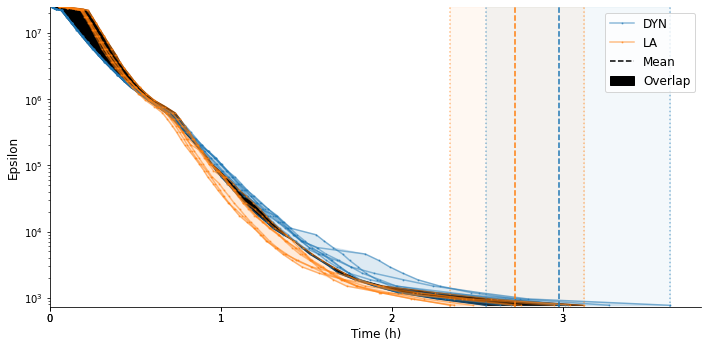

In [8]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
ax = axes
markersize = 1
alpha = 0.5

min_eps = DYNdataframes[j].loc[n_gens-1,"epsilon"]
max_eps = DYNdataframes[j].loc[1,"epsilon"]

ax = axes
ax.plot(DYNdataframes[0]["time_passed_s"], DYNdataframes[0]["epsilon"], label = "DYN",
        color="tab:blue", marker="o", markersize=markersize, alpha=alpha)
for j in range(1,len(histories_DYN)):
    ax.plot(DYNdataframes[j]["time_passed_s"], DYNdataframes[j]["epsilon"],
            color="tab:blue", marker="o", markersize=markersize, alpha=alpha)


ax.plot(LAdataframes[0]["time_passed_s"], LAdataframes[j]["epsilon"], label = "LA",
        color="tab:orange", marker="o", markersize=markersize, alpha=alpha)
for j in range(1,len(histories_LA)):
    ax.plot(LAdataframes[j]["time_passed_s"], LAdataframes[j]["epsilon"],
            color="tab:orange", marker="o", markersize=markersize, alpha=alpha)
ax.fill(np.append(LAMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(LAdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "tab:orange", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(DYNMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(DYNdataframes[0]["epsilon"])[1:])),
        color = "tab:blue", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "black", alpha=1, label="Overlap")

ax.set_yscale("log")
ax.set_ylabel("Epsilon")
ax.set_xlabel("Time (h)")

DYNMinEndtime=min(DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes)))
DYNMaxEndtime=max(DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes)))
LAMinEndtime=min(LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes)))
LAMaxEndtime=max(LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes)))

ax.axvline(DYNMinEndtime, color="tab:blue", linestyle='dotted', alpha=alpha)
ax.axvline(DYNMaxEndtime, color="tab:blue", linestyle='dotted', alpha=alpha)
ax.axvline(DYNMeanTimes[-1], color="tab:blue", linestyle='dashed', alpha=1)
ax.axvline(LAMinEndtime, color="tab:orange", linestyle='dotted', alpha=alpha)
ax.axvline(LAMaxEndtime, color="tab:orange", linestyle='dotted', alpha=alpha)
ax.axvline(LAMeanTimes[-1], color="tab:orange", linestyle='dashed', alpha=1)

ax.plot(0, min_eps, color="black", linestyle="dashed", label="Mean")

ax.fill([DYNMinEndtime, DYNMaxEndtime, DYNMaxEndtime, DYNMinEndtime],
        [0, 0, max_eps, max_eps], color = "tab:blue", alpha=0.05)
ax.fill([LAMinEndtime, LAMaxEndtime, LAMaxEndtime, LAMinEndtime],
        [0, 0, max_eps, max_eps], color = "tab:orange", alpha=0.05)
"""ax.fill([LAMaxEndtime, DYNMinEndtime, DYNMinEndtime, LAMaxEndtime],
        [0, 0, max_eps, max_eps], color = "black", alpha=0.1)"""

ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0.95*min_eps, ymax=max_eps)
xticklabels=[int(a/3600) for a in (ax.get_xticks())]
ax.set_xticks([a*3600 for a in xticklabels])
ax.set_xticklabels(xticklabels)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

fig.tight_layout()
fig.savefig("/home/felipe/MTGraphics/Tumor/TumorStatEpsOverlap.pdf")

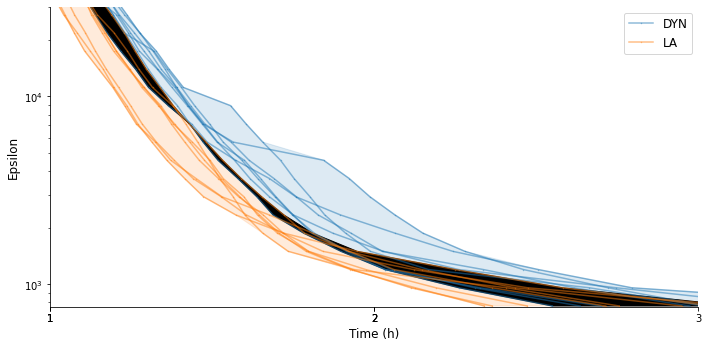

In [9]:
fig, axes = plt.subplots(1,1, figsize=(10,5))

markersize = 0.4
alpha = 0.5

min_eps = DYNdataframes[j].loc[n_gens-1,"epsilon"]

ax = axes
ax.plot(DYNdataframes[0]["time_passed_s"], DYNdataframes[0]["epsilon"], label = "DYN",
        color="tab:blue", marker="o", markersize=markersize, alpha=alpha)
for j in range(1,len(histories_DYN)):
    ax.plot(DYNdataframes[j]["time_passed_s"], DYNdataframes[j]["epsilon"],
            color="tab:blue", marker="o", markersize=markersize, alpha=alpha)


ax.plot(LAdataframes[0]["time_passed_s"], LAdataframes[j]["epsilon"], label = "LA",
        color="tab:orange", marker="o", markersize=markersize, alpha=alpha)
for j in range(1,len(histories_LA)):
    ax.plot(LAdataframes[j]["time_passed_s"], LAdataframes[j]["epsilon"],
            color="tab:orange", marker="o", markersize=markersize, alpha=alpha)

    
ax.fill(np.append(LAMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(LAdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "tab:orange", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(DYNMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(DYNdataframes[0]["epsilon"])[1:])),
        color = "tab:blue", alpha=0.3*alpha)

ax.fill(np.append(DYNMinTimes[1:],np.flip(LAMaxTimes[1:])),
        np.append(np.array(DYNdataframes[0]["epsilon"])[1:],
                  np.flip(np.array(LAdataframes[0]["epsilon"])[1:])),
        color = "black", alpha=1)

ax.set_yscale("log")
ax.set_ylabel("Epsilon")
ax.set_xlabel("Time (h)")

ax.set_xlim(xmin=5000, xmax=3*3600)
ax.set_ylim(ymin=min_eps*0.99,ymax=30000)

xticklabels=[int(a/3600) for a in (ax.get_xticks())]
ax.set_xticks([a*3600 for a in xticklabels])
ax.set_xticklabels(xticklabels)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

fig.tight_layout()
#fig.savefig(path+"/EpsilonOverTimeN"+str(psize)+"V"+str(version)+".pdf")36

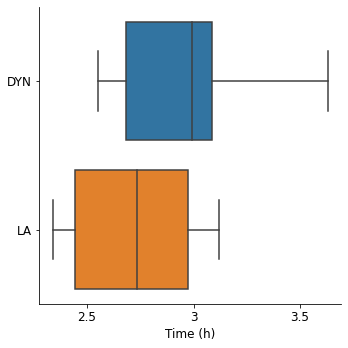

In [11]:
endtimes_LA = np.array([LAdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(LAdataframes))])
endtimes_DYN = np.array([DYNdataframes[j]["time_passed_s"].iloc[-1] for j in range(len(DYNdataframes))])

n_gens = min(len(LAdataframes[j]) for j in range(len(LAdataframes)))

endtimeDF1 = pd.DataFrame([[endtimes_LA[i],"LA"] for i in iters_LA], columns=["Time (s)","Mode"])
endtimeDF2 = pd.DataFrame([[endtimes_DYN[i],"DYN"] for i in iters_DYN], columns=["Time (s)","Mode"])
endtimeDF = pd.concat([endtimeDF2,endtimeDF1])

fig,ax = plt.subplots(1,1,figsize=(5,5))

sns.boxplot(x="Time (s)", y = "Mode", data=endtimeDF, palette={"DYN":"tab:blue", "LA":"tab:orange"})

ax.set_xticks([2.5*3600,3*3600,3.5*3600])
ax.set_xticklabels([2.5,3,3.5])
ax.set_xlabel("Time (h)")
ax.set_ylabel(None)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
fig.savefig("/home/felipe/MTGraphics/Tumor/TumorStatBoxPlot.pdf")